In [12]:
# 1. import libraries
#
# 2. define data directory and create train and test datasets
#
# 3. define model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.constraints import max_norm
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics

from keras.applications import VGG16
from keras.applications import VGG19

ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['/anaconda3/lib/python2.7/site-packages/numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.

In [2]:
# define datasets and directory structure

dataset =  './dataset2/binary/'

# 2 folders - 'damage', 'no_damage'
# 1,150 images in each

In [ ]:
# create training and validation folders
# https://github.com/jfilter/split-folders
# !pip install split-folders

#import split_folders
#input_folder = dataset
#output = dataset + 'split/'
#split_folders.ratio(input_folder, output=output, seed=99, ratio=(.8, .2))

In [3]:
!ls dataset2/binary
!ls dataset2/binary/split

damage	no_damage  split
train  val


In [4]:
vgg = VGG16(weights = 'imagenet', include_top = False, input_shape = (128,128,3), )

for layers in vgg.layers: layers.trainable = False
    
model = Sequential()
model.add(vgg)
model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()  

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# data augmentation of training dataset    
tr_datagen = ImageDataGenerator(rescale = 1./255, 
                                    rotation_range = 40,
                                    width_shift_range = 0.2, 
                                    height_shift_range = 0.2,
                                    shear_range = 0.2, 
                                    zoom_range = 0.2, 
                                    horizontal_flip = True, 
                                    fill_mode = 'nearest')

# create training dataset
tr_set = tr_datagen.flow_from_directory(dataset + 'split/train', target_size = (128,128),
                                            batch_size = 20, class_mode = 'binary')

# create test datset
te_datagen = ImageDataGenerator(rescale = 1./255)
te_set = te_datagen.flow_from_directory(dataset + 'split/val', target_size = (128,128),
                                            batch_size = 20, class_mode = 'binary', shuffle='False')

# train the model
model.fit_generator(tr_set, steps_per_epoch = 1840, epochs = 50,
                        validation_data = te_set, validation_steps = 460)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________
Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.
Epoch 1/50
1840/1840 [=================

In [5]:
model.save('binary_adam_aws_1.h5')

In [10]:
def plot_results(model = model):

    sns.set(style="whitegrid", palette="bright", color_codes=True)
    epochs = range(1,51)
    plt.plot(epochs, model.history.history['acc'], 'b', label='Training')
    plt.plot(epochs, model.history.history['val_acc'], 'r', label='Validation')
    plt.title('Training and Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.xlim(0.9,50)
    plt.ylim(0.5,1)
    plt.legend()

    plt.figure()
    plt.plot(epochs, model.history.history['loss'], 'b', label='Training')
    plt.plot(epochs, model.history.history['val_loss'], 'r', label='Validation')
    plt.title('Training and Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.xlim(0.9,50)
    #plt.ylim(0,1)
    plt.legend()
    plt.show()

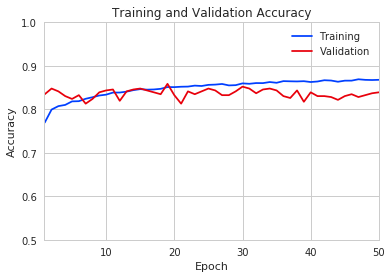

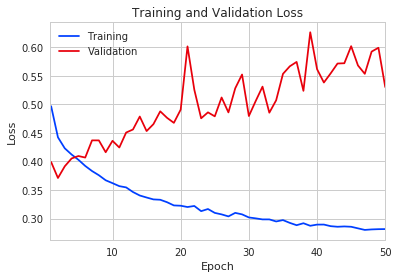

In [11]:
plot_results()